In [1]:
import numpy as np
import cv2
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cooltools
import cooler
import cooltools.lib.plotting
from cooltools import numutils

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/projects/ps-renlab/y2xie/anaconda3/envs/seurat/lib/python3.9/site-packages/llvmlite/llvmpy/__init__.py:3: UserWarning: The module `llvmlite.llvmpy` is deprecated and will be removed in the future.
  warnings.warn(
/projects/ps-renlab/y2xie/anaconda3/envs/seurat/lib/python3.9/site-packages/llvmlite/llvmpy/core.py:8: UserWarning: The module `llvmlite.llvmpy.core` is deprecated and will be removed in the future. Equivalent functionality is provided by `llvmlite.ir`.
  warnings.warn(
/projects/ps-renlab/y2xie/anaconda3/envs/seurat/lib/python3.9/site-packages/llvmlite/llvmpy/passes.py:17: UserWarning: The module `llvmlite.llvmpy.passes` is deprecated and will be removed in the future. If you are using this code, it should be inlined into your own project.
  warnings.warn(


In [2]:
# HiC basics metrices
# import core packages
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations

# import semi-core packages
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use('seaborn-poster')

# import open2c libraries
import bioframe
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

## Bulk COLO320 copy number (Fig.3A)

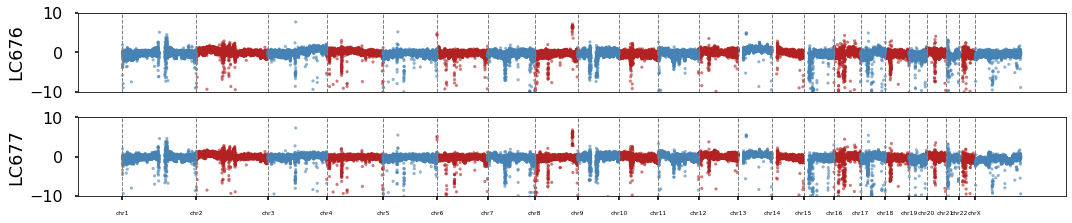

In [251]:
### Copy number on pseudobulk level is calculated using neoloop_cnv.sh
f, axes = plt.subplots(2, 1, figsize=(15, 3.2), sharex="row")
for tt, cell in enumerate(["LC676", "LC677"]): 
    bd  = pd.read_csv('../../57.scHiC_COLO/04.matrices/neoloop_cnv/' + cell + '_merged_hg38/1000000.CNV.bedGraph', 
                      sep = '\t', names = ['chrom', 'start', 'end', 'residuals'])
    bd['chrom'] = pd.Categorical(bd['chrom'], categories=clr.chromnames[0:23], ordered=True)
    pos = [bd[bd['chrom'] == qchr].index[0] for qchr in np.unique(bd['chrom'])]
    bd1 = bd.loc[bd['chrom'].isin(clr.chromnames[0:23][1::2])]
    bd2 = bd.loc[bd['chrom'].isin(clr.chromnames[0:23][::2])]
    
    ax = axes[tt]
    sns.scatterplot(np.log2(bd1['residuals']), edgecolor = "none", s=10*2**0.01, ax=ax, alpha = 0.6, color='firebrick')
    sns.scatterplot(np.log2(bd2['residuals']), edgecolor = "none", s=10*2**0.01, ax=ax, alpha = 0.6, color='steelblue')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_ylabel(cell)
    ax.set_ylim(-10, 10)
    for position in pos:
        ax.axvline(x=position, color='gray', linestyle='--', linewidth = 1)

ax.set_xticks(pos)
ax.set_xticklabels(np.unique(bd['chrom']), fontsize = 6)

plt.tight_layout()
plt.savefig("plot/COLO320_DM_HSR_bulk_copy_number_by_library.pdf")

In [289]:
### take top 50 cells with the most number of contacts
cnv_bd = []
cnv_cell = []

stat1 = pd.read_csv("../../57.scHiC_COLO/03.mapping/LC677_merged_hg38.PairCount.stat.csv", sep = '\t', index_col=0) ### this is calculated during pre-processing
cell1 = pd.read_csv("../../57.scHiC_COLO/04.matrices/LC677_cell_list.txt", header=None) ### this is selected during pre-processing
cell1['bc'] = cell1[0].str.split('_').str.get(-1)
stat1 = stat1.loc[cell1['bc']]
cells = cell1.loc[cell1['bc'].isin(stat1.sort_values(by='total', ascending=False).head(100).index)][0]

for cell in cells:
    cls = cell[0:5]
    try:
        bd = pd.read_csv('../../57.scHiC_COLO/04.matrices/' + cls + '/' + cell + '/5000000.CNV.bedGraph', 
                          sep = '\t', names = ['chrom', 'start', 'end', 'residuals'])
        cnv_bd.append(bd['residuals'].values)
        cnv_cell.append(cell)
    except FileNotFoundError: ### in case single cell job encounters failure
        print(cell + ".mcool cannot be found")
    except KeyError:
        print(cell + ".mcool cannot be found")
               
               
    
bd['chrom'] = pd.Categorical(bd['chrom'], categories=clr.chromnames[0:23], ordered=True)
pos = [bd[bd['chrom'] == qchr].index[0] for qchr in np.unique(bd['chrom'])]
bd1 = bd.loc[bd['chrom'].isin(clr.chromnames[0:23][1::2])]
bd2 = bd.loc[bd['chrom'].isin(clr.chromnames[0:23][::2])]

pd.DataFrame(cells).to_csv("../../57.scHiC_COLO/04.matrices/LC676_top100.txt", index=False, header=False)

LC677_merged_hg38.sc_AAATGAGTCCCTAAAG.mcool cannot be found
LC677_merged_hg38.sc_AACATCGGTATCACAC.mcool cannot be found
LC677_merged_hg38.sc_AACATCGTCCGTACGG.mcool cannot be found
LC677_merged_hg38.sc_AACATCGTCTTACGGA.mcool cannot be found
LC677_merged_hg38.sc_AACGAGGCATGCACTA.mcool cannot be found
LC677_merged_hg38.sc_AACTGGTAGCCTATAC.mcool cannot be found
LC677_merged_hg38.sc_AAGGTTCGTCAGAGTG.mcool cannot be found
LC677_merged_hg38.sc_AATGGAACAATAGTGA.mcool cannot be found
LC677_merged_hg38.sc_ACAAAGACACAGGAAC.mcool cannot be found
LC677_merged_hg38.sc_ACCAAACTCGCAAACT.mcool cannot be found
LC677_merged_hg38.sc_ACTCGGGAGTATAGTG.mcool cannot be found
LC677_merged_hg38.sc_ACTGCAAGTCAACAGG.mcool cannot be found
LC677_merged_hg38.sc_ACTGTCCAGCGAATAT.mcool cannot be found
LC677_merged_hg38.sc_ACTTTCAGTACTTCGA.mcool cannot be found
LC677_merged_hg38.sc_ATCGAGTAGCACGTAG.mcool cannot be found
LC677_merged_hg38.sc_ATTCGTTTCGCCAGAC.mcool cannot be found
LC677_merged_hg38.sc_ATTGTCTAGTGAAACT.mc

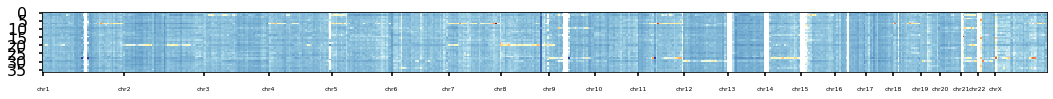

In [290]:
f, ax = plt.subplots(figsize=(18, 8))
im = ax.matshow(np.log2(np.array(cnv_bd) + 1), norm = LogNorm(vmax = 10), cmap = 'RdYlBu')
ax.set_xticks(pos)
ax.set_xticklabels(np.unique(bd['chrom']), fontsize = 6)
ax.xaxis.set_ticks_position('bottom')

tmp = pd.DataFrame(cnv_bd)
tmp.index = cnv_cell
tmp.columns = bd[['chrom', 'start', 'end']].astype(str).agg('-'.join, axis=1)
tmp.to_csv('../../57.scHiC_COLO/05.R/LC677_COLO320HSR_copy_number_bycells.xls', sep = '\t')

## Visualize structual variation (Fig.3B)

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 31 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'a', 'c', 'colon', 'd', 'e', 'five', 'four', 'h', 'hyphen', 'l', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'period', 'r', 's', 'semicolon', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 37, 68, 70, 71, 72, 75, 79, 81, 82, 85, 86, 87, 88, 3228]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 31 glyphs after
INFO:fontTools.subset:G

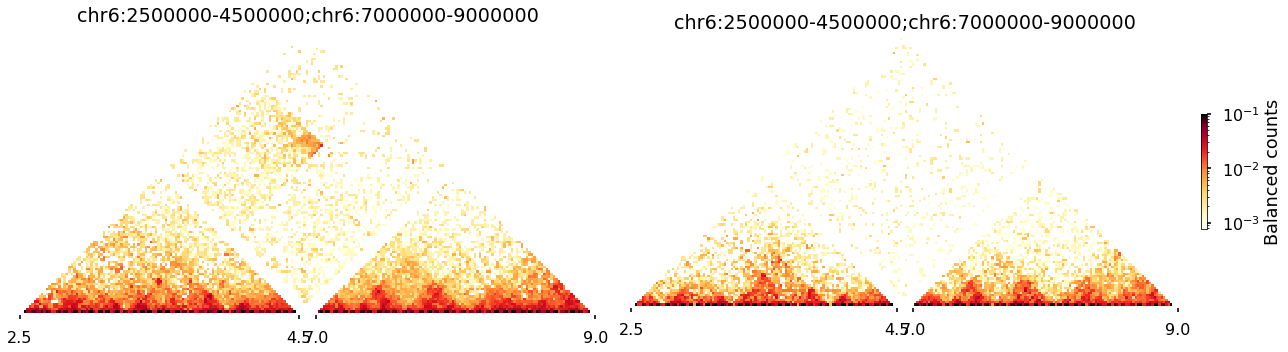

In [292]:
### For each case plot an example
chromp = 'chr6'
anchor_pos1 = [2_500_000, 4_500_000]
anchor_pos2 = [7_000_000, 9_000_000]
res = 25_000
nempt = 5
vvmax = 0.1
anchor1 = [int(ii / res) for ii in anchor_pos1]
anchor2 = [int(ii / res) for ii in anchor_pos2]
Qchr_subset = np.concatenate([np.arange(anchor1[0], anchor1[1]), np.arange(anchor2[0], anchor2[1])])
Qannotate = [ii / 1000000 for ii in np.concatenate([anchor_pos1, anchor_pos2])]
Qtitle = chromp + ':' + '-'.join([str(element) for element in anchor_pos1]) + ';' + chromp + ':' + '-'.join([str(element) for element in anchor_pos2])

f, axes = plt.subplots(1, 2, figsize=(18, 9))

for idx, cls in enumerate(['LC676', 'LC677']):
    clr = cooler.Cooler(f'../../59.GBM_COLO_NovaSeq_230606/04.matrices/' + cls + '_merged_hg38.mcool::resolutions/' + str(res))
    Q = clr.matrix(balance=True).fetch(chromp)
    Q = Q - np.diag(np.diag(Q))

    ### insert white space
    Qnew = Q[Qchr_subset][:, Qchr_subset]

    ### update columns and rows
    emptyc = np.zeros((Qnew.shape[0], nempt))
    Qnew = np.insert(Qnew, [(anchor1[1] - anchor1[0])], emptyc, axis=1)
    emptyc = np.zeros((nempt, Qnew.shape[1]))
    Qnew = np.insert(Qnew, (anchor1[1] - anchor1[0]), emptyc, axis=0)

    Qrotate = nd.rotate(Qnew, 45, order=0, reshape=True, prefilter=False, cval=0)
    pos_list_new = [0, (anchor1[1] - anchor1[0]), (anchor1[1] - anchor1[0] + nempt), (anchor1[1] - anchor1[0] + anchor2[1] - anchor2[0] + nempt)]
    new_pos_list = [round(np.sqrt(2)*ii) for ii in pos_list_new]

    ax = axes[idx]
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    im = ax.matshow(Qrotate, cmap='fall', norm=LogNorm(vmax = vvmax))

    h = len(Qrotate)
    ax.set_ylim([0.5*h, 0])
    ax.set_xlim([0, h])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_xticks(new_pos_list)
    ax.set_xticklabels(Qannotate)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(Qtitle)

plt.colorbar(im, fraction=0.01, pad=0.04, label='Balanced counts')
plt.tight_layout()
plt.savefig(f"plot/COLO320_DM_HSR_bulk_SV_{chromp}_{anchor_pos1[0]}_{anchor_pos2[1]}_res{res}.pdf")

## Plot genome wide contact map (Fig.3C)

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 26 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'L', 'a', 'c', 'd', 'e', 'eight', 'five', 'four', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26, 27, 37, 38, 47, 68, 70, 71, 72, 79, 81, 82, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 26 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'L', 'a', 'c', 'd', 'e', 'eig

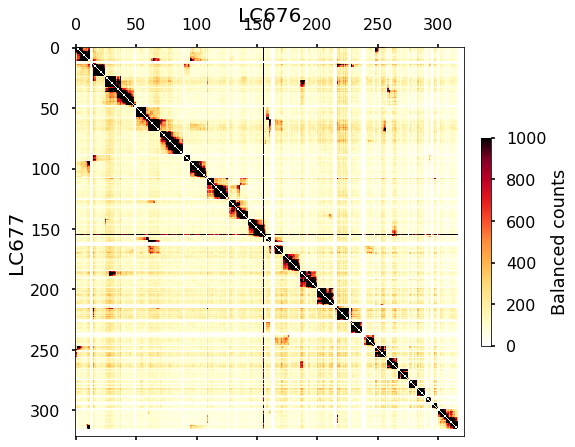

In [4]:
sample = ['LC676', 'LC677']

res = 10000000
clr = cooler.Cooler(f'../../57.scHiC_COLO/04.matrices/' + sample[0] + '_merged_hg38.mcool::resolutions/' + str(res))
clr1 = cooler.Cooler(f'../../57.scHiC_COLO/04.matrices/' + sample[1] + '_merged_hg38.mcool::resolutions/' + str(res))

chromp = 'chr8'
start = 126000000
end = 129000000
region = (chromp, start, end)
f, ax = plt.subplots(figsize=(8, 7.5))

### remove sex chromosome
upper_tri = clr.matrix(balance=False)[:]#.fetch(region)
lower_tri = clr1.matrix(balance=False)[:]#.fetch(region)

### combine two matrix into one
combined = np.zeros_like(upper_tri)
combined[np.triu_indices_from(combined)] = upper_tri[np.triu_indices_from(upper_tri)]
combined[np.tril_indices_from(combined, k=-1)] = lower_tri[np.tril_indices_from(lower_tri, k=-1)]

### mask diagonal
# mask = np.zeros_like(combined)
# np.fill_diagonal(mask, True)
combined_mask = combined - np.diag(np.diag(combined))
im = ax.matshow(combined_mask, cmap='fall', vmax = 1000)
# format_ticks(ax)
ax.annotate(sample[0], xy=(0.5, 1.08), xytext=(0.5, 1.08), fontsize=20,
             xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='center')

ax.annotate(sample[1], xy=(0, 0.5), xytext=(-0.15, 0.5), fontsize=20, 
             xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='center', rotation=90)
ax.xaxis.set_label_position('top')

plt.colorbar(im, ax=ax, fraction=0.025, pad=0.04, label='Balanced counts')
ax.xaxis.set_label_position('top')
plt.tight_layout()

plt.savefig(f"plot/COLO320_LC676_LC677_bulk_contacts_genome_wide_res10M.pdf")

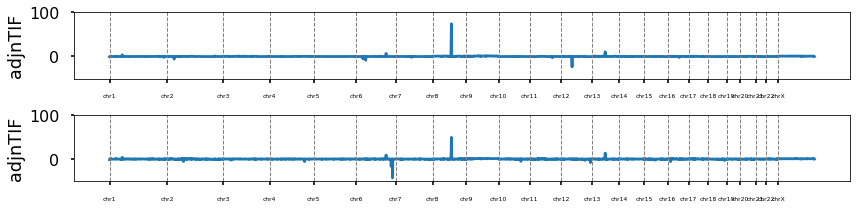

In [9]:
### Plot genome wide adjTIF
### adjTIF is calculated in 03.COLO320_analysis_2
chromp = 'chr8'
start, end = 126_000_000, 128_500_000

sample = ['LC676', 'LC677']
f, axes = plt.subplots(2, 1, figsize=(12, 3))
for idx, cls in enumerate(sample):
    tif = pd.read_csv(f"../../57.scHiC_COLO/05.R/{cls}_bulk_adjTIF.bedGraph", sep = '\t', names = ['chrom', 'start', 'end' , 'adjtif'])
    # tif.sort_values(by="chrom", key=lambda column: column.map(lambda e: clr.chromnames.index(e)), inplace=True)
    tif['chrom'] = pd.Categorical(tif['chrom'], categories=clr.chromnames, ordered=True)
    tif = tif.sort_values(by='chrom')
    tif = tif.reset_index(drop=True)
    
    pos = [tif[tif['chrom'] == qchr].index[0] for qchr in np.unique(tif['chrom'])]

    ax = axes[idx]
    sns.lineplot(data = tif['adjtif'], ax = ax)

    ax.set_xticks(pos)
    ax.set_xticklabels(np.unique(tif['chrom']), fontsize = 6)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylabel("adjnTIF")
    ax.set_ylim([-50, 100])
    for position in pos:
        ax.axvline(x=position, color='gray', linestyle='--', linewidth = 1)
        
plt.tight_layout()
# plt.savefig("plot/COLO320_LC676_LC677_bulk_adjTIF_genome_wide_res1M.pdf")